## data loader

In [1]:
from graphlstm_vae_ad import GraphLSTM_VAE_AD
import pandas as pd
import numpy as np

process = "lu.C.16_pmu"
# process2 = "lu.C.16_inject_cpuocp"
duration = "100ms"

DATASET = "/root/MPI_profile/"+ process + "/" + duration + "/node_feature.csv"
TOPOLOGY = "/root/MPI_profile/"+ process + "/" + duration + "/graph_edge"

# DATASET2 = "/root/MPI_profile/"+ process2 + "/" + duration + "/node_feature.csv"
# TOPOLOGY = "/home/sx/MPI_profile/"+ process + "/" + duration + "/graph_edge"

def edge_load(filename, len):
    edge_data = pd.read_csv(filename, header=0)
    edge_data = edge_data.groupby(['ts_id','src', 'dst']).agg({'commsize': 'sum'}).reset_index()
    edge_index_dict = {}
    edge_weight_dict = {}
    for ts_id, group in edge_data.groupby('ts_id'):
        edge_index = group[['src', 'dst']].values.T.tolist()  # Transpose to get shape (2, num_edges)
        edge_index_dict[ts_id] = edge_index

        edge_weight = group['commsize'].values.tolist()
        edge_weight_dict[ts_id] = edge_weight

    edge_index_list = []
    edge_weight_list = []
    for i in range(len):
        if i in edge_index_dict.keys():
            edge_index_list.append(edge_index_dict[i])
            edge_weight_list.append(edge_weight_dict[i])

            
        else:
            edge_index_list.append([[], []])
            edge_weight_list.append([])

    return edge_index_list, edge_weight_list


def data_load(filename): 
    data = pd.read_csv(filename, header=[0,1])
    data.columns.names = ['metric', 'host']
    tempm = data.stack()
    tempm = (tempm-tempm.mean())/(tempm.std())
    metric = tempm.unstack().swaplevel('metric','host',axis=1).stack().unstack()

    edge_index, edge_weight = edge_load(TOPOLOGY, len(metric))
    # edge_data = pd.read_csv(TOPOLOGY, header=0)
    # edge_data = edge_data.groupby(['ts_id','src', 'dst']).agg({'commsize': 'sum'}).reset_index()
    # edge_data = edge_data.groupby(['src', 'dst']).agg({'commsize': 'sum'}).reset_index()

    # edge_index = edge_data[['src', 'dst']].values.T.tolist()
    # edge_weight = edge_data['commsize'].values.tolist()

    print("metric:")
    print(len(metric))

    print("Edge Index:")
    print(len(edge_index))
    print(edge_index)

    print("Edge Weight:")
    print(len(edge_weight))
    print(edge_weight)

    return metric, edge_index, edge_weight

metric, edge_index, edge_weight = data_load(DATASET)
# metric2, edge_index, edge_weight = data_load(DATASET2)


metric:
393
Edge Index:
393
[[[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[], []], [[0, 1, 1, 2, 4, 6, 8, 9, 9, 10, 12, 14], [1, 0, 2, 3, 5, 7, 9, 8, 10, 11, 13, 15]], [[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15], [1, 4, 0, 2, 5, 1, 3, 6, 2, 7, 0, 5, 8, 1, 4, 6, 9, 2, 5, 7, 10, 3, 6, 11, 4, 9, 12, 5, 8, 10, 13, 6, 9, 11, 14, 7, 10, 15, 8, 13, 9, 12, 14, 10, 13, 15, 11, 14]], [[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15], [1, 4, 0, 2, 5, 1, 3, 6, 2, 7, 0, 5, 8, 1, 4, 6, 9, 2, 5, 7, 10, 3, 6, 11, 4, 9, 12, 5, 8, 10, 13, 6, 9, 11, 14, 7, 10, 15, 8, 13, 9, 12, 14, 10, 13, 15, 11, 14]], [[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12,

## 加载数据与模型

In [2]:
print(len(metric))

393


In [3]:
# model = GraphLSTM_VAE_AD(sequence_length=120, gpu=1)
# process = "lu.C.16"
# duration = "100ms_closed"
model = GraphLSTM_VAE_AD(name=process + "_" + duration, kind='GCN', gpu=0,  sequence_length=30, hidden_dim=8, batch_size=32, lr=1e-3, num_epochs=1000)

## 训练模型

Epoch [118/1000], Iter [4/7], total_loss: 4606.4175
valid_loss: [8426.245930989584, 8324.526041666666, 8106.238118489583, 8091.142578125, 7911.287272135417, 8004.697916666667, 7848.563313802083, 7645.078450520833, 7426.7998046875, 7389.2158203125, 7022.54736328125, 6822.43310546875, 6551.380045572917, 6343.029296875, 6070.70166015625, 5862.61376953125, 5753.09130859375, 5680.408365885417, 5679.823404947917, 5445.0537109375, 5411.501302083333, 5307.248046875, 5284.850911458333, 5258.838704427083, 5247.122721354167, 5223.4921875, 5266.876953125, 5225.788899739583, 5042.382161458333, 5046.7666015625, 5258.440266927083, 5199.652994791667, 5118.415852864583, 5179.477213541667, 5012.640462239583, 5072.423502604167, 5004.207194010417, 5022.20458984375, 5053.744466145833, 5082.323404947917, 5211.013997395833, 5002.951985677083, 4922.616373697917, 5089.34814453125, 4912.006510416667, 4831.316731770833, 4874.890299479167, 5038.09033203125, 4859.00732421875, 5013.734700520833, 5064.138671875, 494

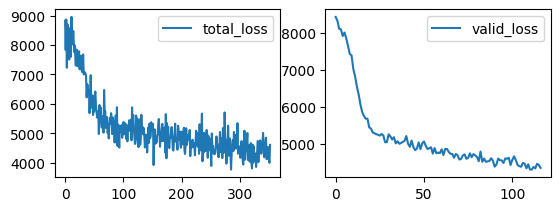

 71%|███████▏  | 5/7 [00:03<00:01,  1.26it/s]

In [4]:
model.fit(metric, 16, edge_index, log_step=2, patience=30, step=10)

In [39]:
model.load(16, metric.shape[1])

In [40]:
scores_sum = []
scores_max = []
scores = []
outputs = []
scores, scores_sum, scores_max, outputs = model.predict(metric, 16, edge_index, 1)

100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

304
(30,)
304
(30, 27)


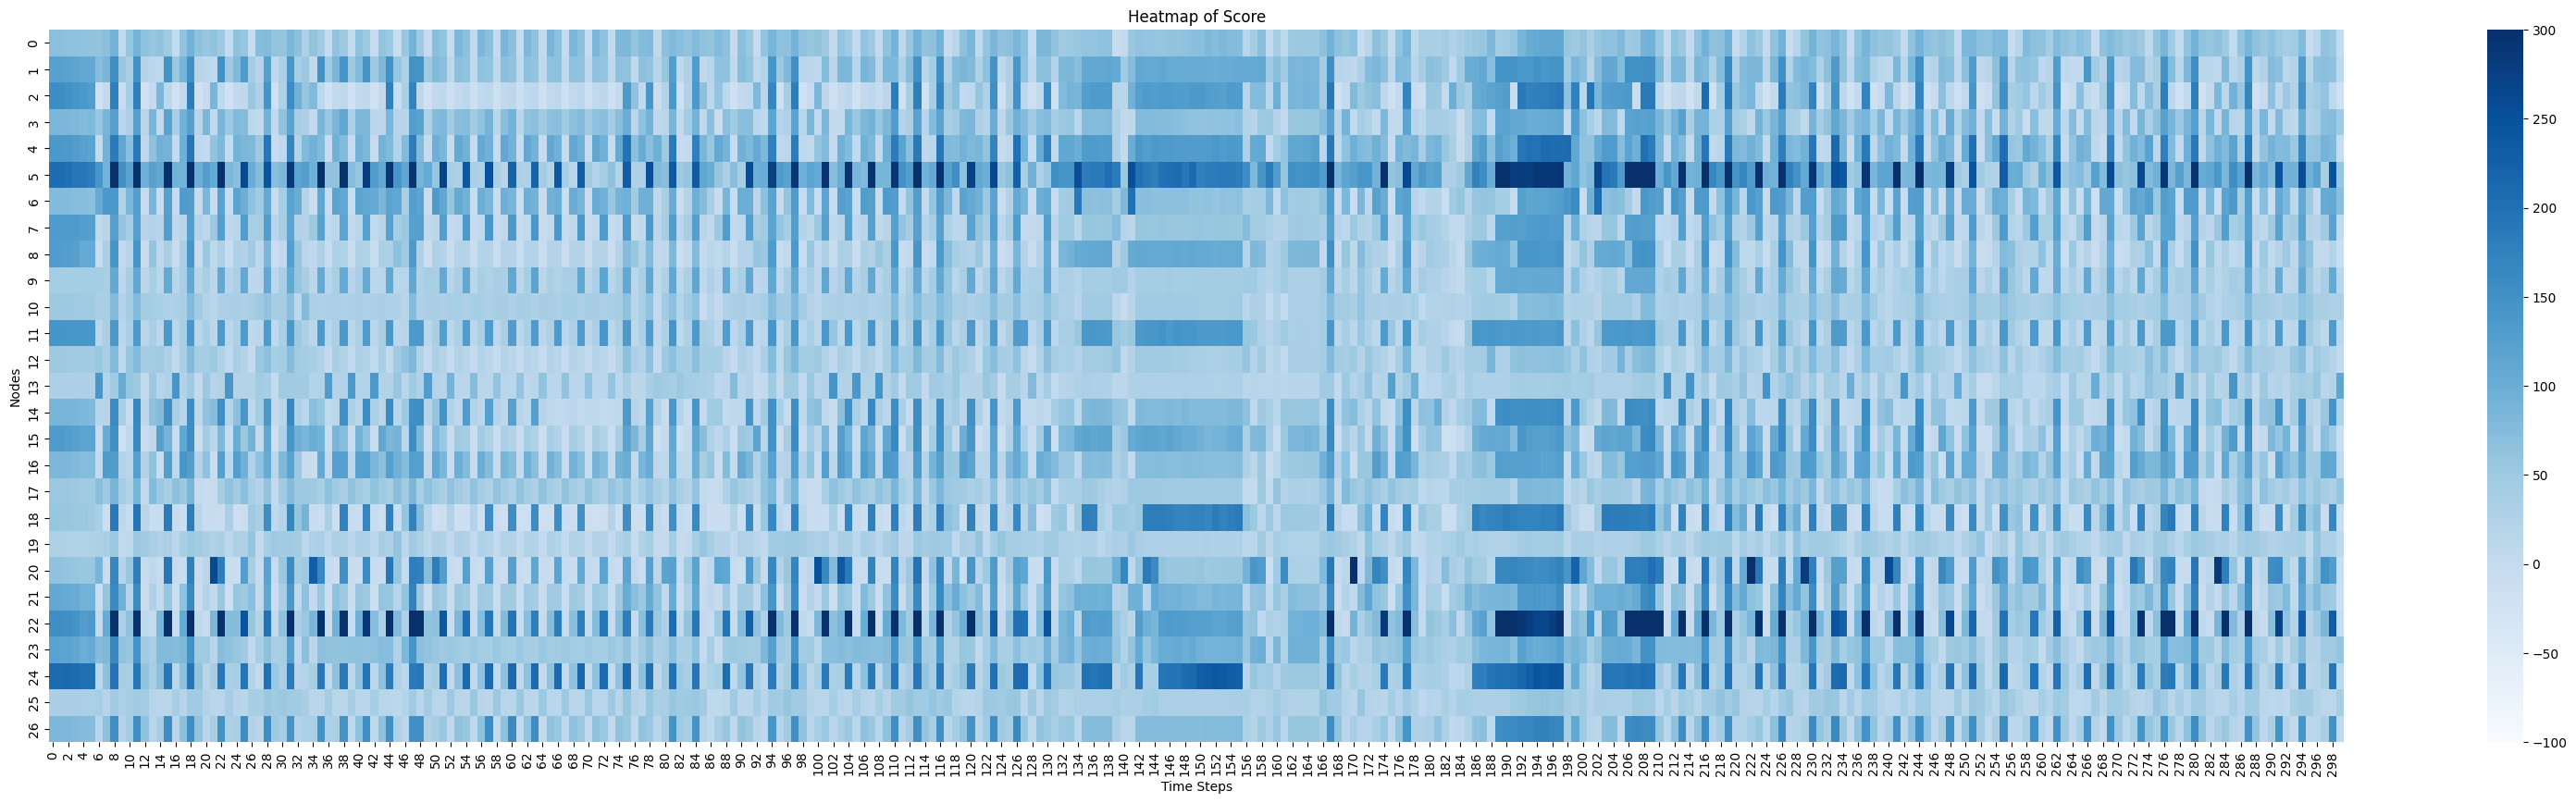

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sequence_length = 30
step = 10

shuffle_scores = scores
# print(scores.shape)
# # shuffle_scores = []
# shuffle_scores = np.zeros_like(scores)
# for seq in scores:
#     for step_index in range(sequence_length):
#         idx = step_index * step
#         shuffle_scores[idx:idx + step] += seq[step_index]



# 假设 scores_sum 是形状为 (699, 16) 的数组
# scores_sum = np.random.rand(699, 16)
shuffle_scores = shuffle_scores.T
# shuffle_scores = shuffle_scores[:, :360]
# 设置绘图尺寸
plt.figure(figsize=(10, 4))

# 使用 seaborn 绘制热力图
# vmin=-100, vmax=1500
sns.heatmap(shuffle_scores, cmap='Blues', cbar=True)

# 设置标题和标签
plt.title('Heatmap of Scores', fontsize=12)
plt.xlabel('Trace Slices', fontsize=12)
plt.ylabel('Nodes', fontsize=12)

# 显示热力图
plt.show()

In [26]:
mylog = open('output.txt', mode = 'a',encoding='utf-8')
for i in range(len(outputs)):
    print(outputs[i], file=mylog)
mylog.close()
# df_outputs = pd.DataFrame(data=outputs)
# df_outputs.to_csv('outputs.csv')
# print(outputs)

In [28]:
mylog = open('scores_max.txt', mode = 'a',encoding='utf-8')
for i in range(len(scores_max)):
    print(scores_max[i], file=mylog)
mylog.close()